In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

In [2]:
batch_size = 64
learning_rate = 0.001
epochs = 10

class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 16, 3, stride=2, padding=1),  # Input: 1x28x28, Output: 16x14x14
            nn.ReLU(),
            nn.Conv2d(16, 32, 3, stride=2, padding=1),  # Input: 16x14x14, Output: 32x7x7
            nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(32, 16, 3, stride=2, padding=1, output_padding=1),  # Output: 16x14x14
            nn.ReLU(),
            nn.ConvTranspose2d(16, 1, 3, stride=2, padding=1, output_padding=1),  # Output: 1x28x28
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [3]:
transform = transforms.Compose([transforms.ToTensor()])
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
print(len(train_dataset))
print(len(train_loader))

100%|██████████| 9912422/9912422 [00:00<00:00, 169217446.27it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 21330462.02it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 40200256.90it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 20374897.08it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

60000
938


In [4]:
autoencoder = Autoencoder()
optimizer = optim.Adam(autoencoder.parameters(), lr=learning_rate)
criterion = nn.MSELoss()

In [5]:
for epoch in range(epochs):
    for data in train_loader:
        img, _ = data
        optimizer.zero_grad()
        recon = autoencoder(img)
        loss = criterion(recon, img)
        loss.backward()
        optimizer.step()
    print(f'Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}')

Epoch [1/10], Loss: 0.0012
Epoch [2/10], Loss: 0.0008
Epoch [3/10], Loss: 0.0006
Epoch [4/10], Loss: 0.0005
Epoch [5/10], Loss: 0.0004
Epoch [6/10], Loss: 0.0004
Epoch [7/10], Loss: 0.0004
Epoch [8/10], Loss: 0.0003
Epoch [9/10], Loss: 0.0003
Epoch [10/10], Loss: 0.0003


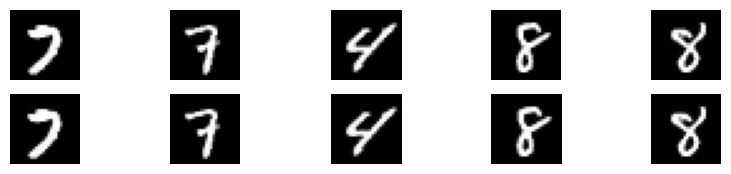

In [6]:
with torch.no_grad():
    for data in train_loader:
        img, _ = data
        recon = autoencoder(img)
        break

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 2))
for i in range(5):
    plt.subplot(2, 5, i + 1)
    plt.imshow(img[i][0], cmap='gray')
    plt.axis('off')
    plt.subplot(2, 5, i + 6)
    plt.imshow(recon[i][0], cmap='gray')
    plt.axis('off')
plt.show()